In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions

In [7]:
df = pd.read_csv("placement.csv")
df

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


C:\Users\anils\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa', ylabel='resume_score'>

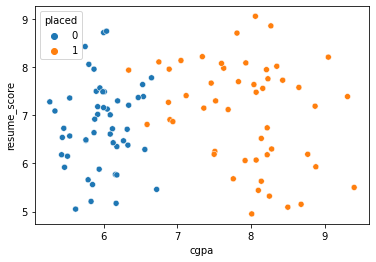

In [9]:
sns.scatterplot(df["cgpa"],df["resume_score"],hue=df["placed"])

In [15]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [16]:
per_clasfier = Perceptron()
per_clasfier.fit(x,y)

Perceptron()

In [17]:
per_clasfier.coef_

array([[ 40.26, -36.  ]])

In [18]:
per_clasfier.intercept_

array([-25.])

C:\Users\anils\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<AxesSubplot:>

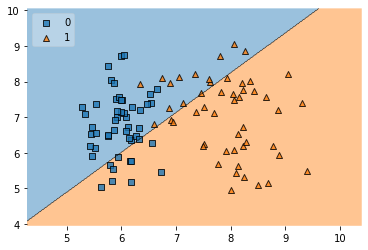

In [28]:
plot_decision_regions(x.values,y.values,clf = per_clasfier,legend = 2)

# Perceptron Trick

In [96]:
df = pd.read_csv("placement.csv")
df

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


In [97]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [98]:
def perceptron_trick(x,y):
    learn_rate = 0.01
    x =np.insert(np.array(x),0,1,axis = 1) ### here we adding bias
    weights = np.ones(x.shape[1])
    epochs = 100000
    
    for i in range(epochs):
        random_num = np.random.randint(0,100)
        y_hat = step(x[random_num],weights)
        y_act = y[random_num]
        weights = weights + learn_rate*(y_act - y_hat)*x[random_num]
    return weights[0],weights[1:]
        

In [99]:
def step(weights, inp):
    res = np.dot(inp,weights)
    if res< 0:
        return 0
    else:
        return 1

In [100]:
intercept_,coeff_ = perceptron_trick(x,y)

In [101]:
print(intercept_,coeff_)

-6.479999999999907 [0.9197 0.0568]


In [102]:
coeff_

array([0.9197, 0.0568])

In [103]:
m = -(coeff_[0]/coeff_[1])
c = -(intercept_/coeff_[1])


In [104]:
print(m,c)

-16.191901408445833 114.08450704222064


In [105]:
x.iloc[0:1,0]

0    8.14
Name: cgpa, dtype: float64

In [106]:
y

0     1
1     0
2     1
3     1
4     1
     ..
95    0
96    1
97    0
98    1
99    0
Name: placed, Length: 100, dtype: int64

In [107]:
x_input = x.iloc[:,0]
y_input = m*x_input  + c

(3.0, 10.0)

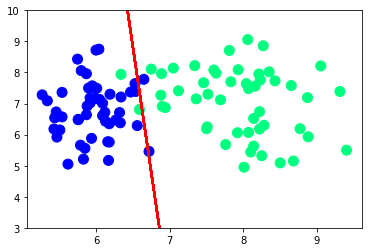

In [115]:
plt.plot(x.iloc[:,0],m*x.iloc[:,0] + c,color = 'red',linewidth = 2)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y,cmap = "winter", s =100)
plt.ylim(3,10)

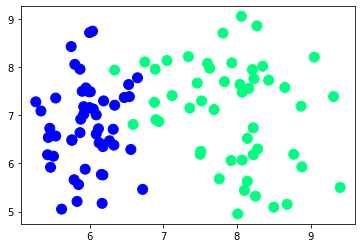

In [109]:
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y,cmap = "winter", s =100)